# HarvardX: PH125.4x 
## Data Science: Inference and Modeling



# Parameters and estimates

#### Exercise 5

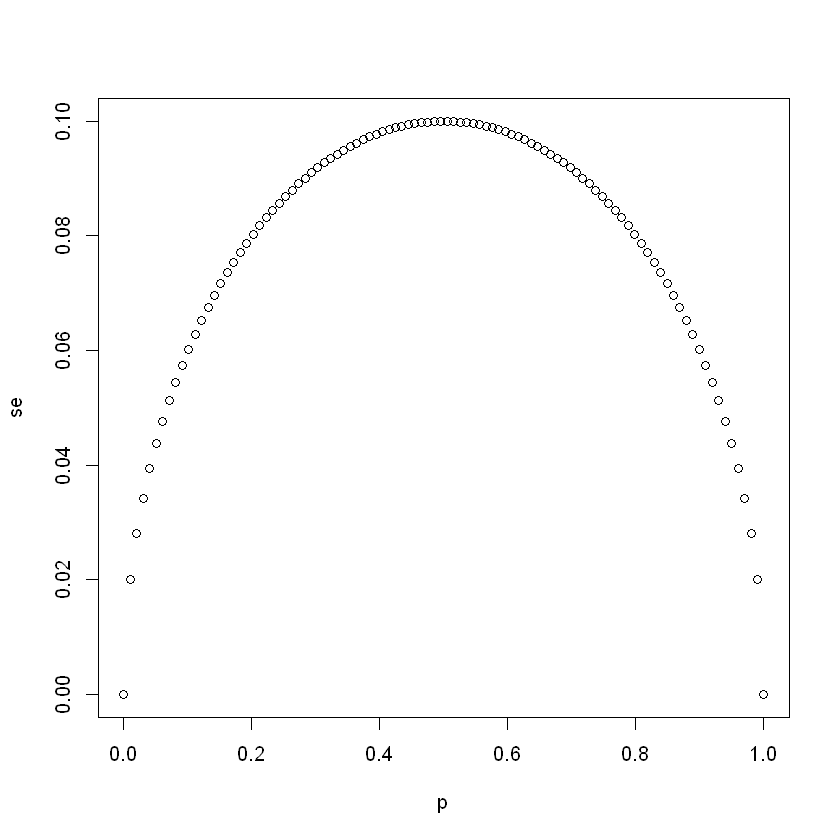

In [1]:
# `N` represents the number of people polled
N <- 25

# Create a variable `p` that contains 100 proportions ranging from 0 to 1 using the `seq` function
p <- seq(0, 1, length = 100)

# Create a variable `se` that contains the standard error of each sample average
se <- sqrt(p*(1-p)/N)

# Plot `p` on the x-axis and `se` on the y-axis
plot(p, se)

#### Exercise 6

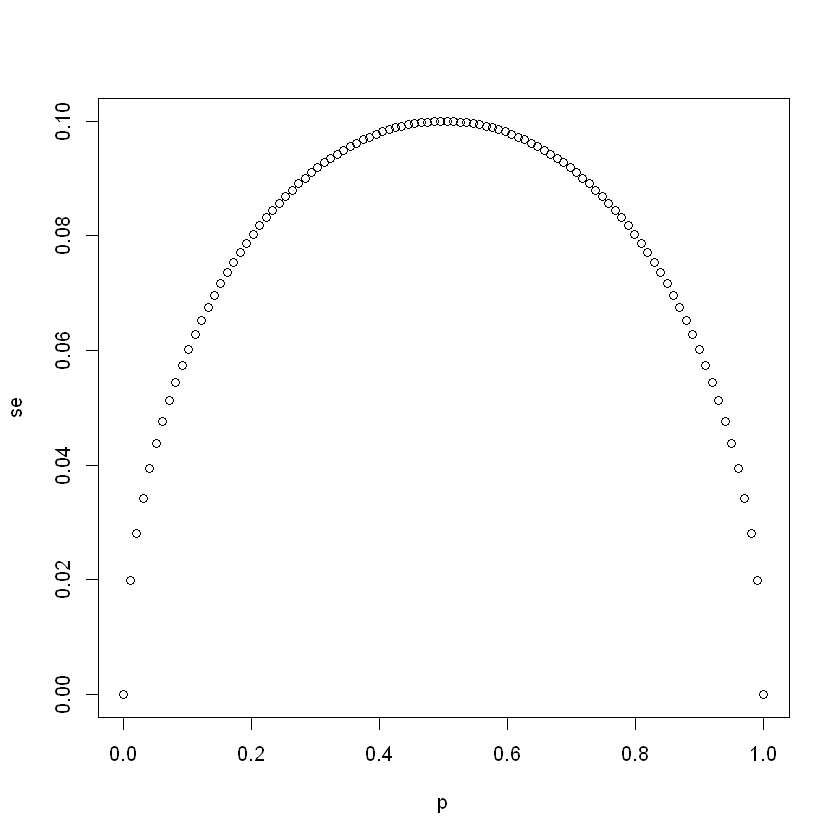

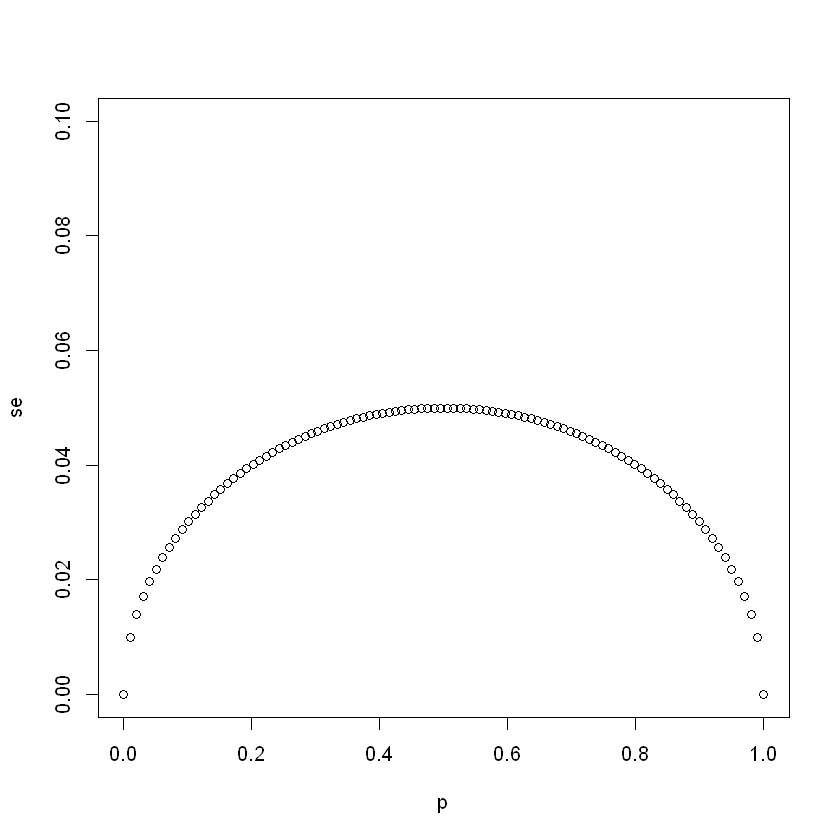

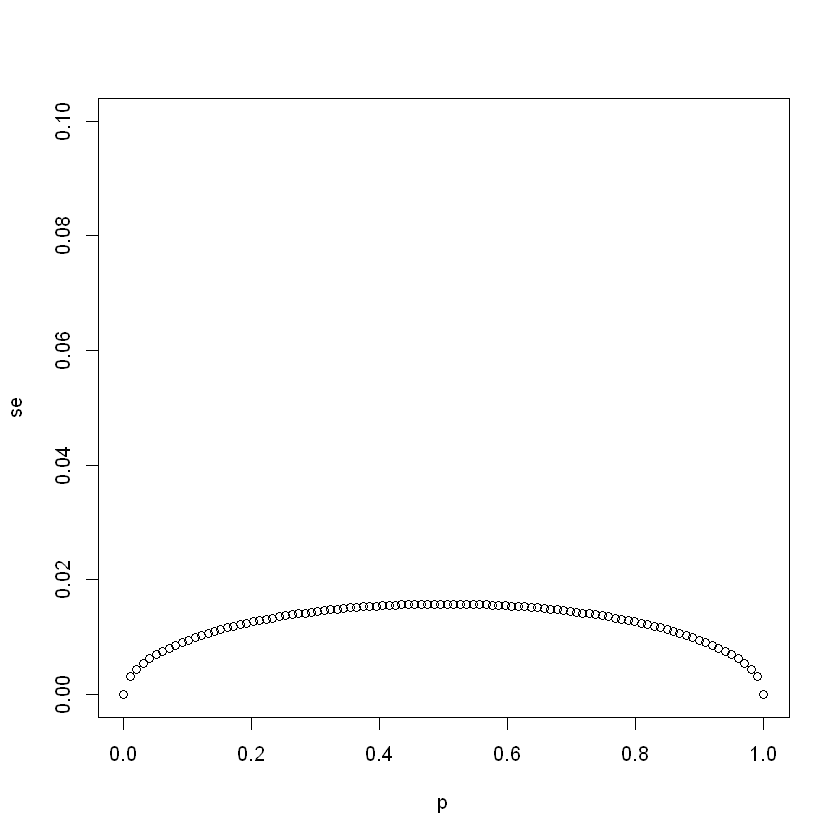

In [2]:
# The vector `p` contains 100 proportions of Democrats ranging from 0 to 1 using the `seq` function
p <- seq(0, 1, length = 100)

# The vector `sample_sizes` contains the three sample sizes
sample_sizes <- c(25, 100, 1000)

# Write a for-loop that calculates the standard error `se` for every value of `p` for each of the three samples 
# sizes `N` in the vector `sample_sizes`. Plot the three graphs, using the `ylim` argument to standardize the y-axis across all three plots.
for(samples in sample_sizes){
  se <- sqrt(p*(1-p)/samples)
  plot(p,se,ylim=c(0, 0.1))
}

#### Exercise 7. Expected value of d
Our estimate for the difference in proportions of Democrats and Republicans is d=X¯−(1−X¯)

Which derivation correctly uses the rules we learned about sums of random variables and scaled random variables to derive the expected value of d
?

In [3]:
4

[1] 4

#### Exercise 8. Standard error of d

Our estimate for the difference in proportions of Democrats and Republicans is d=X¯−(1−X¯)

Which derivation correctly uses the rules we learned about sums of random variables and scaled random variables to derive the standard error of d
?

In [4]:
3

[1] 3

#### Exercise 9. Standard error of the spread

Say the actual proportion of Democratic voters is p=0.45
. In this case, the Republican party is winning by a relatively large margin of d=−0.1, or a 10% margin of victory. What is the standard error of the spread 2X¯−1 in this case?


In [5]:
# `N` represents the number of people polled
N <- 25

# `p` represents the proportion of Democratic voters
p <- 0.45

# Calculate the standard error of the spread. Print this value to the console.
2 * sqrt(p * (1 - p) / N) 

[1] 0.1989975

#### Exercise 10. Sample size

So far we have said that the difference between the proportion of Democratic voters and Republican voters is about 10% and that the standard error of this spread is about 0.2 when N=25
. Select the statement that explains why this sample size is sufficient or not.

In [6]:
2

[1] 2

# Central limit theorem

#### Exercise 1. Sample average

Write function called take_sample that takes the proportion of Democrats p and the sample size N

as arguments and returns the sample average of Democrats (1) and Republicans (0).

Calculate the sample average if the proportion of Democrats equals 0.45 and the sample size is 100.

In [7]:
# Write a function called `take_sample` that takes `p` and `N` as arguements and returns the average value of a randomly sampled population.
take_sample <- function(p, N){
  mean(sample(0:1, N, replace=T, prob=c(1-p,p)))
}
           
# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# Define `p` as the proportion of Democrats in the population being polled
p <- 0.45

# Define `N` as the number of people polled
N <- 100

# Call the `take_sample` function to determine the sample average of `N` randomly selected people from a population containing a proportion of Democrats equal to `p`. Print this value to the console.
take_sample(p,N)


[1] 0.46

#### Exercise 2. Distribution of errors - 1

Assume the proportion of Democrats in the population p
equals 0.45 and that your sample size N is 100 polled voters. The take_sample function you defined previously generates our estimate, X¯

.

Replicate the random sampling 10,000 times and calculate p−X¯
for each random sample. Save these differences as a vector called errors. Find the average of errors and plot a histogram of the distribution.

https://www.rdocumentation.org/packages/Rpdb/versions/2.2/topics/replicate

In [8]:
# Define `p` as the proportion of Democrats in the population being polled
p <- 0.45

# Define `N` as the number of people polled
N <- 100

# The variable `B` specifies the number of times we want the sample to be replicated
B <- 10000

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# Create an objected called `errors` that replicates subtracting the result of the `take_sample` function from `p` for `B` replications
errors <- replicate(B, {p - take_sample(p,N)})

# Calculate the mean of the errors. Print this value to the console.
mean(errors)

[1] -4.9e-05

#### Exercise 3. Distribution of errors - 2

In the last exercise, you made a vector of differences between the actual value for p
and an estimate, X¯

. We called these differences between the actual and estimated values errors.

The errors object has already been loaded for you. Use the hist function to plot a histogram of the values contained in the vector errors. Which statement best describes the distribution of the errors?


[1] 3

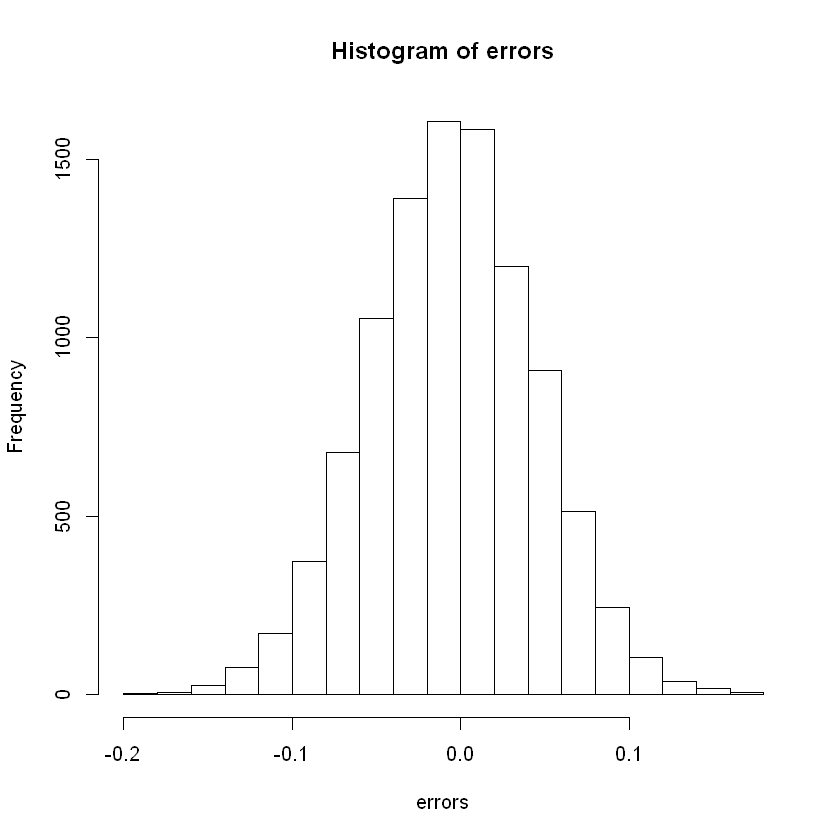

In [9]:
hist(errors)
3

#### Exercise 4. Average size of error

The error p−X¯
is a random variable. In practice, the error is not observed because we do not know the actual proportion of Democratic voters, p

. However, we can describe the size of the error by constructing a simulation.

What is the average size of the error if we define the size by taking the absolute value ∣p−X¯∣
?


In [10]:
# Define `p` as the proportion of Democrats in the population being polled
p <- 0.45

# Define `N` as the number of people polled
N <- 100

# The variable `B` specifies the number of times we want the sample to be replicated
B <- 10000

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# We generated `errors` by subtracting the estimate from the actual proportion of Democratic voters
errors <- replicate(B, p - take_sample(p, N))

# Calculate the mean of the absolute value of each simulated error. Print this value to the console.
mean(abs(errors))

[1] 0.039267

#### Exercise 5. Standard deviation of the spread

The standard error is related to the typical size of the error we make when predicting. We say size because, as we just saw, the errors are centered around 0. In that sense, the typical error is 0. For mathematical reasons related to the central limit theorem, we actually use the standard deviation of errors rather than the average of the absolute values.

As we have discussed, the standard error is the square root of the average squared distance (X¯−p)2

. The standard deviation is defined as the square root of the distance squared.

Calculate the standard deviation of the spread.

In [11]:
# Define `p` as the proportion of Democrats in the population being polled
p <- 0.45

# Define `N` as the number of people polled
N <- 100

# The variable `B` specifies the number of times we want the sample to be replicated
B <- 10000

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# We generated `errors` by subtracting the estimate from the actual proportion of Democratic voters
errors <- replicate(B, p - take_sample(p, N))

# Calculate the standard deviation of `errors`
sqrt(mean(errors^2))

[1] 0.04949939

#### Exercise 6. Estimating the standard error

The theory we just learned tells us what this standard deviation is going to be because it is the standard error of X¯

.

Estimate the standard error given an expected value of 0.45 and a sample size of 100.

In [12]:
# Define `p` as the expected value equal to 0.45
p <- 0.45

# Define `N` as the sample size
N <- 100

# Calculate the standard error
sqrt(p*(1-p)/N)

[1] 0.04974937

dddd

In [13]:
# Define `p` as a proportion of Democratic voters to simulate
p <- 0.45

# Define `N` as the sample size
N <- 100

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# Define `X` as a random sample of `N` voters with a probability of picking a Democrat ('1') equal to `p`
X <- sample(0:1, N, replace=T, p=c(1-p,p))

# Define `X_bar` as the average sampled proportion
X_bar <- mean(X)

# Calculate the standard error of the estimate. Print the result to the console.
sqrt(X_bar*(1-X_bar)/N)

[1] 0.04983974

#### Exercise 8. Plotting the standard error

The standard error estimates obtained from the Monte Carlo simulation, the theoretical prediction, and the estimate of the theoretical prediction are all very close, which tells us that the theory is working. This gives us a practical approach to knowing the typical error we will make if we predict p
with X^. The theoretical result gives us an idea of how large a sample size is required to obtain the precision we need. Earlier we learned that the largest standard errors occur for p=0.5

.

Create a plot of the largest standard error for N

ranging from 100 to 5,000. Based on this plot, how large does the sample size have to be to have a standard error of about 1%?

N <- seq(100, 5000, len = 100)
p <- 0.5
se <- sqrt(p*(1-p)/N)


In [14]:
plot(N,se)
3

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


#### Exercise 9. Distribution of X-hat

For N=100
, the central limit theorem tells us that the distribution of X^ is...

In [ ]:
2

#### Exercise 10. Distribution of the errors

We calculated a vector errors that contained, for each simulated sample, the difference between the actual value p
and our estimate X^

.

The errors X¯−p
are:

In [ ]:
2

#### Exercise 11. Plotting the errors

Make a qq-plot of the errors you generated previously to see if they follow a normal distribution.

In [ ]:
# Define `p` as the proportion of Democrats in the population being polled
p <- 0.45

# Define `N` as the number of people polled
N <- 100

# The variable `B` specifies the number of times we want the sample to be replicated
B <- 10000

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# Generate `errors` by subtracting the estimate from the actual proportion of Democratic voters
errors <- replicate(B, p - take_sample(p, N))

# Generate a qq-plot of `errors` with a qq-line showing a normal distribution
qqnorm(errors)
qqline(errors)

#### Exercise 12. Estimating the probability of a specific value of X-bar

If p=0.45
and N=100, use the central limit theorem to estimate the probability that X¯>0.5.

In [ ]:
# Define `p` as the proportion of Democrats in the population being polled
p <- 0.45

# Define `N` as the number of people polled
N <- 100

# Calculate the probability that the estimated proportion of Democrats in the population is greater than 0.5. Print this value to the console.
1-pnorm(0.5, mean = p, sd=(sqrt(p*(1-p)/N)))

#### Exercise 13. Estimating the probability of a specific error size

Assume you are in a practical situation and you don't know p
. Take a sample of size N=100 and obtain a sample average of X¯=0.51

.

What is the CLT approximation for the probability that your error is equal or larger than 0.01?

In [ ]:
# Define `N` as the number of people polled
N <-100

# Define `X_hat` as the sample average
X_hat <- 0.51

# Define `se_hat` as the standard error of the sample average
se_hat <- sqrt(X_hat*(1-X_hat)/N)

# Calculate the probability that the error is 0.01 or larger
1 - pnorm(.01, 0, se_hat) + pnorm(-0.01, 0, se_hat)

# Confidence intervals

#### Exercise 1. Confidence interval for p

For the following exercises, we will use actual poll data from the 2016 election. The exercises will contain pre-loaded data from the dslabs package.

library(dslabs)
data("polls_us_election_2016")

We will use all the national polls that ended within a few weeks before the election.

Assume there are only two candidates and construct a 95% confidence interval for the election night proportion p
.

In [ ]:
# Load the data
data(polls_us_election_2016)

# Generate an object `polls` that contains data filtered for polls that ended on or after October 31, 2016 in the United States
polls <- filter(polls_us_election_2016, enddate >= "2016-10-31" & state == "U.S.")

# How many rows does `polls` contain? Print this value to the console.
nrow(polls)

# Assign the sample size of the first poll in `polls` to a variable called `N`. Print this value to the console.
N <- head(polls$samplesize,1)
N

# For the first poll in `polls`, assign the estimated percentage of Clinton voters to a variable called `X_hat`. Print this value to the console.
X_hat <- (head(polls$rawpoll_clinton,1)/100)
X_hat

# Calculate the standard error of `X_hat` and save it to a variable called `se_hat`. Print this value to the console.
se_hat <- sqrt(X_hat*(1-X_hat)/N)
se_hat

# Use `qnorm` to calculate the 95% confidence interval for the proportion of Clinton voters. Save the lower and then the upper confidence interval to a variable called `ci`.
qnorm(0.975)
ci <- c(X_hat - qnorm(0.975)*se_hat, X_hat + qnorm(0.975)*se_hat)

#### Exercise 2. Pollster results for p

Create a new object called pollster_results that contains the pollster's name, the end date of the poll, the proportion of voters who declared a vote for Clinton, the standard error of this estimate, and the lower and upper bounds of the confidence interval for the estimate.

In [ ]:
# The `polls` object that filtered all the data by date and nation has already been loaded. Examine it using the `head` function.
head(polls)

# Create a new object called `pollster_results` that contains columns for pollster name, end date, X_hat, lower confidence interval, and upper confidence interval for each poll.
polls <- mutate(polls, X_hat = polls$rawpoll_clinton/100, se_hat = sqrt(X_hat*(1-X_hat)/polls$samplesize), lower = X_hat - qnorm(0.975)*se_hat, upper = X_hat + qnorm(0.975)*se_hat)
pollster_results <- select(polls, pollster, enddate, X_hat, se_hat, lower, upper)

#### Exercise 3. Comparing to actual results - p

The final tally for the popular vote was Clinton 48.2% and Trump 46.1%. Add a column called hit to pollster_results that states if the confidence interval included the true proportion p=0.482
or not. What proportion of confidence intervals included p?

In [ ]:
# The `pollster_results` object has already been loaded. Examine it using the `head` function.
head(pollster_results)

# Add a logical variable called `hit` that indicates whether the actual value exists within the confidence interval of each poll. Summarize the average `hit` result to determine the proportion of polls with confidence intervals include the actual value. Save the result as an object called `avg_hit`.
avg_hit <- pollster_results %>% mutate(hit=(lower<0.482 & upper>0.482)) %>% summarize(mean(hit))
avg_hit

#### Exercise 5. Confidence interval for d

A much smaller proportion of the polls than expected produce confidence intervals containing p
. Notice that most polls that fail to include p

are underestimating. The rationale for this is that undecided voters historically divide evenly between the two main candidates on election day.

In this case, it is more informative to estimate the spread or the difference between the proportion of two candidates d
, or 0.482−0.461=0.021

for this election.

Assume that there are only two parties and that d=2p−1
. Construct a 95% confidence interval for difference in proportions on election night.

In [ ]:
# Add a statement to this line of code that will add a new column named `d_hat` to `polls`. The new column should contain the difference in the proportion of voters.
polls <- polls_us_election_2016 %>% filter(enddate >= "2016-10-31" & state == "U.S.") 


# Assign the sample size of the first poll in `polls` to a variable called `N`. Print this value to the console.
N <- head(polls,1)$samplesize
N

# For the difference `d_hat` of the first poll in `polls` to a variable called `d_hat`. Print this value to the console.
polls <- mutate(polls, d_hat = (polls$rawpoll_clinton - polls$rawpoll_trump)/100)
polls

# Assign proportion of votes for Clinton to the variable `X_hat`.
polls <- mutate(polls, X_hat = (polls$rawpoll_clinton - polls$rawpoll_trump)/100)
polls

# Calculate the standard error of the spread and save it to a variable called `se_hat`. Print this value to the console.
polls <- mutate(polls, se_hat = sqrt(X_hat*(1-X_hat)/N))
polls

# Use `qnorm` to calculate the 95% confidence interval for the difference in the proportions of voters. Save the lower and then the upper confidence interval to a variable called `ci`.
ci <- c(polls$X_hat - (qnorm(0.975) * polls$se_hat), polls$X_hat + (qnorm(0.975) * polls$se_hat))
ci